In [1]:
import numpy as np
from numpy import random
import math
import matplotlib.pyplot as plt
from scipy.stats import gamma

In [2]:
    
    abundances = gamma.rvs(a=1, size=1000)
    #abundances = np.array([110,90,110,90,110,90,110,90,110,90,80,70,60,50,40,20,10,4,2,1])
    abundances.sort() 
    combs=(len(abundances)*(len(abundances)-1))/2
   
    def pvp(x):
        total = 0
        for i, xi in enumerate(x[:-1], 1):
             total +=np.sum((np.abs(xi - x[i:])/xi))
        return total/combs
    
    def pvm(x):
        total = 0
        for i, xi in enumerate(x[:-1], 1):
             total +=np.sum(np.abs(xi - x[i:])/(x[i:]))
        return total/combs  
    
   
    PVplus=pvp(abundances)
    PVprime=1-(1/(1+PVplus))
    PVminus=pvm(abundances)
    PVdprime=1-(1/(1+PVminus))
    PV=(PVprime+PVdprime)/2
    
    CV=np.std(abundances)/np.mean(abundances)     
    
    logvals=[math.log(i) for i in abundances]
    SDL=np.std(logvals)

    

In [3]:
print(PV,CV,SDL)

0.6629775095702826 1.0185727757458554 1.3477656842670456


In [4]:
print(PVplus,PVprime,PVminus,PVdprime)

15.587847792087203 0.9397149037937866 0.6293016617809861 0.3862401153467786


In [5]:
combs

499500.0

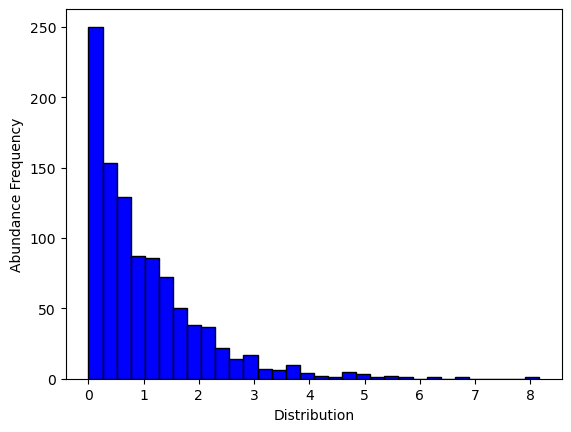

In [6]:
plt.hist(abundances, color = 'blue', edgecolor = 'black', bins = round(np.sqrt(len(abundances))))
plt.xlabel('Distribution')
plt.ylabel('Abundance Frequency')
plt.show()